In [9]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import sklearn.neighbors
from sklearn import metrics
from sklearn.preprocessing import scale
from collections import Counter

In [26]:
df = pd.read_csv(r'C:\Users\adith\Downloads\pima-indians-diabetes.csv', header=None) #Loading dataset
df.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [27]:
import numpy as np
from collections import Counter

# implementation of the KNN algorithm
class CustomKNN:
    def __init__(self, n_neighbors=3, p=2):
        self.n_neighbors = n_neighbors  # Number of neighbors
        self.p = p  # Power parameter for Minkowski distance
    
    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
    
    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []
        for test_point in X_test:
            predictions.append(self._predict_single(test_point))
        return np.array(predictions)
    
    def _predict_single(self, test_point):
        distances = []
        for x_train in self.X_train:
            dist = np.sum(np.abs(test_point - x_train) ** self.p) ** (1/self.p)
            distances.append(dist)
        
        k_indices = np.argsort(distances)[:self.n_neighbors]
        
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
        return most_common_label

In [32]:
# Prepare data
X = df.iloc[:, :-1].values  # Features ('pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age')
y = df.iloc[:, -1].values  # Labels ('label')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [33]:
# Initialize and train the model
knn = CustomKNN(n_neighbors=3, p=2)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

In [34]:
# Evaluate accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.71


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[84 17]
 [27 26]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       101
           1       0.60      0.49      0.54        53

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.71       154



In [41]:
# Custom accuracy function
def custom_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

In [42]:
# Implementing the loop to test different k values without using sklearn's accuracy_score
k_range = range(1, 20)
score_list = []

for k in k_range:
    # Initialize and train the custom KNN model
    knn = CustomKNN(n_neighbors=k, p=2)
    knn.fit(X_train, y_train)
    
    # Predict using the custom KNN
    y_pred = knn.predict(X_test)
    
    # Calculate the accuracy using the custom accuracy function
    accuracy = custom_accuracy(y_test, y_pred)
    
    # Store the accuracy for each k
    score_list.append(accuracy)

In [43]:
# Output the accuracy for each value of k
print(score_list)

[0.6818181818181818, 0.6818181818181818, 0.7142857142857143, 0.7077922077922078, 0.6883116883116883, 0.7467532467532467, 0.7142857142857143, 0.7207792207792207, 0.7272727272727273, 0.7337662337662337, 0.7012987012987013, 0.7077922077922078, 0.7207792207792207, 0.7337662337662337, 0.7402597402597403, 0.7207792207792207, 0.7272727272727273, 0.7142857142857143, 0.7272727272727273]


Text(0, 0.5, 'Test Accuracy')

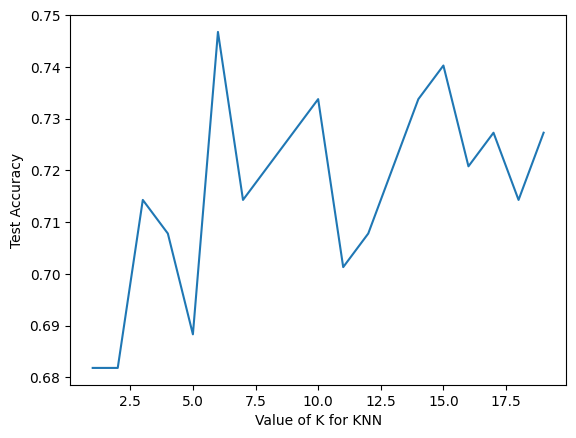

In [44]:
import matplotlib.pyplot as plt
plt.plot(k_range,score_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Accuracy')

In [52]:
new_test = pd.DataFrame([[6, 148, 72, 35, 0, 33.6, 0.627, 50],
                         [1, 85, 66, 29, 0, 26.6, 0.351, 31],
                         [8, 183, 64, 0, 0, 23.3, 0.672, 32],
                         [1, 89, 66, 23, 94, 28.1, 0.167, 21],
                         [0, 137, 40, 35, 168, 43.1, 2.288, 33]], 
                        columns=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age'])

knn = CustomKNN(n_neighbors=3, p=2)
knn.fit(X_train, y_train) 

# Predict for new data
y_pred = knn.predict(new_test)
print(y_pred)

[1 0 1 0 1]
